# 90°剥離試験の解析

## 粘着力の初期上昇時間を60℃恒温槽で短縮できるか？


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('thermostatic_chamber_time_reduction.csv',sep="\t"
                 ,skiprows=2
                 ,names=['1','2','3','4']
                 )
# 2n行目が下限荷重、2n+1行目が上限荷重, n=0,1,2,3:恒温槽で加熱した回数。
print(df)

        1       2       3       4
0   36.14   59.01   58.01   64.07
1   38.43   61.77   60.72   65.96
2  205.16  193.17  167.70  198.31
3  207.84  197.51  173.09  202.83
4  181.39  197.50  174.70  202.83
5  184.35  202.83  178.09  205.44


In [3]:
#2n行目と2n+1行目の平均と差をとり、各列ごとにプロットする。
weight=df.to_numpy()
average = np.empty(0) #上限と下限の平均
diff = np.empty(0)  #上限と下限の差分
nmeasure = 3 #
nsample = 4

for n in range(3):
    row1 = weight[2*n] 
    row2 = weight[2*n+1]
    average = np.append(average,(row1+row2)/2)
    diff = np.append(diff,abs(row1-row2))
average = average.reshape(nmeasure,nsample).T
diff = diff.reshape(nmeasure,nsample).T
print("average=",average,"\n")    
print("diff=",diff,"\n")    


average= [[ 37.285 206.5   182.87 ]
 [ 60.39  195.34  200.165]
 [ 59.365 170.395 176.395]
 [ 65.015 200.57  204.135]] 

diff= [[2.29 2.68 2.96]
 [2.76 4.34 5.33]
 [2.71 5.39 3.39]
 [1.89 4.52 2.61]] 



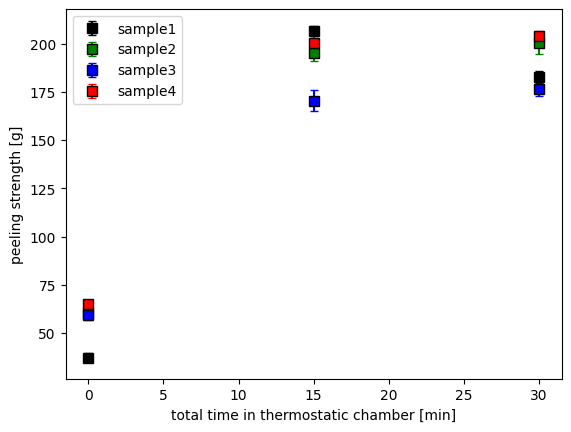

In [4]:
# 各点を平均値とする
x = [0,15,30]
fig, ax = plt.subplots()
colors = ['black','green','blue','red']

for i in range(4): 
    ax.errorbar(x, average[i], yerr=diff[i], capsize=3, fmt='s'
                , ecolor=colors[i], color=colors[i],ms=7, mec='k'
                , label=f'sample{i+1}')

ax.set_xlabel('total time in thermostatic chamber [min]')
ax.set_ylabel('peeling strength [g]')
ax.legend()
# ax.set_title('peeling strength acceleration')
plt.show()

# 加速率の計算

******* 70 *******
Accel rate =  1.7752262348735526
******* 80 *******
Accel rate =  1.9526968875834334
******* 90 *******
Accel rate =  2.136667531174038


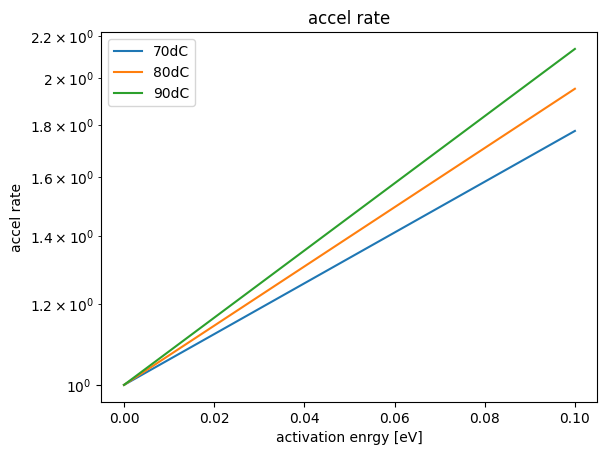

In [70]:
import numpy as np 
import matplotlib.pyplot as plt

def arrhenius_equation(temperature, activation_energy_in_eV):
	gas_constant = 8.314 #J/(mol*K)
	eV = 9.6E4
	reaction_rate_constant = np.exp(-activation_energy_in_eV*eV / (gas_constant * temperature))

	return reaction_rate_constant

Ea :float
Ea= 0.1 #in [eV]
T0 = 293.15


T_celsius = 80
for T_celsius in [70,80,90]:
	print(f'******* {T_celsius} *******')
	T_accel = 273.15 + T_celsius
	k_room_temp = arrhenius_equation(T0,Ea)
	k_Accel = arrhenius_equation(T_accel,Ea)
	accel_rate = k_Accel/k_room_temp
	print("Accel rate = ",accel_rate)

	x = np.linspace(0,Ea,100)
	y = arrhenius_equation(T_accel,x)/arrhenius_equation(T0,x)
	plt.plot(x,y,label=f'{T_celsius}dC')
plt.title(f"accel rate")
plt.xlabel("activation enrgy [eV]")
plt.ylabel("accel rate")
plt.yscale("log")
plt.legend()
plt.show()

## ファイバー線密度の計算

In [1]:
import numpy

mm =0.1
g = 1
cm =1

rho_core = 1.05*g/cm**3
rho_clad = 1.19*g/cm**3
S_core = (0.96*mm)**2 #mm^2
S_clad = 1*mm**2-S_core		#mm^2

lambda_core =  rho_core*S_core #core線密度g/cm
lambda_clad =  rho_clad*S_clad #clad線密度g/cm
line_density = lambda_core + lambda_clad
print(f"line_density = {line_density:.2e}")


line_density = 1.06e-02
